In [12]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

/var/folders/b3/l10x2d9503j4vrszk86wqw040000gn/T/ipykernel_13293/1083902628.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


In [19]:
pclFiles = ['../scan/mg5_scan_8TeV.pcl']
dfs = [pd.read_pickle(f) for f in pclFiles]
dataDF = pd.concat(dfs, ignore_index=True)

In [27]:
xsecs = dataDF[['mass.9900026', 'xsec8TeV(fb).9900026']]

In [28]:
xsecs = xsecs.rename(columns={'mass.9900026': 'mass', 'xsec8TeV(fb).9900026': 'xsec'})

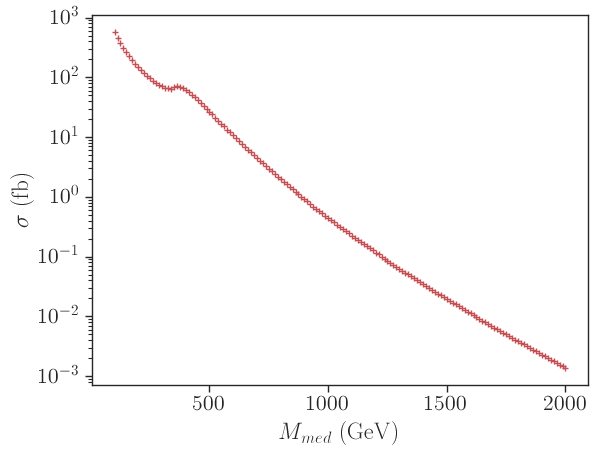

In [29]:
plt.plot(xsecs.mass, xsecs.xsec, 'r+')

plt.yscale('log')
plt.xlabel(r'$M_{med}$ (GeV)')
plt.ylabel(r'$\sigma$ (fb)')

plt.show()

In [26]:
dataDF[['mass.9900026', 'xsec8TeV(fb).9900026']][dataDF['xsec8TeV(fb).9900026']<0]

,mass.9900026,xsec8TeV(fb).9900026


In [15]:
from scipy import interpolate

f = interpolate.interp1d(xsecs.mass, xsecs.xsec, kind='linear')

In [16]:
massNew = np.arange(1002, 4000, 1)
xsecNew = f(massNew)

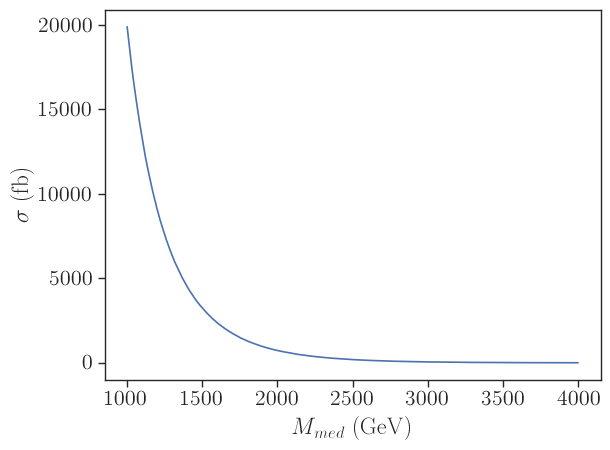

In [17]:
# plt.plot(xsecs.mass, xsecs.xsec, 'r+')
plt.plot(massNew, xsecNew, '-')

# plt.yscale('log')
plt.xlabel(r'$M_{med}$ (GeV)')
plt.ylabel(r'$\sigma$ (fb)')

plt.show()

In [38]:
finalState = [9900032]
mass = 'mass.'+str(finalState[0])

In [39]:
mass

'mass.9900032'

In [46]:
def GetXSection(Mmed=2000, finalState=[9900032]):
    '''
    Function that obtains the cross sections from interpolation given the input mass

    :param Mmed: mediator particle mass (in GeV)
    :param finalState: list of final string or PDG (e.g. ['zp'])

    :return: mediator production cross-section (in pb)
    '''

    dataScan = pd.read_pickle('../data/smodels-results/results.pcl')
    mass = []
    xsec = []
    for id in finalState:
        mass.append('mass.'+str(id))
        xsec.append('xsec13TeV(fb).'+str(id))

    xsecScan = dataScan[[mass[0], xsec[0]]]
    xsecFunction = interpolate.interp1d(xsecScan[mass[0]], xsecScan[xsec[0]])
    xsecNew = xsecFunction(Mmed)/1000
    print(xsecNew)

In [47]:
GetXSection()

0.7336133759734524


In [42]:
xsecNew

array([1.98944777e+04, 1.98143591e+04, 1.97342404e+04, ...,
       4.19101040e+00, 4.17195246e+00, 4.15289453e+00])

In [48]:
f(2000)

array(733.61337597)

In [60]:
Mmed=[2000]
finalStates=[9900032]

In [70]:
masses = {pid: 0 for pid in finalStates}
xsecNew = {pid: 0 for pid in finalStates}
for i, m in enumerate(Mmed):
    masses[finalStates[i]] = m

dataScan = pd.read_pickle('../data/smodels-results/results.pcl')

xsecScan = dataScan[['mass.'+str(finalStates[0]), 'xsec13TeV(fb).'+str(finalStates[0])]]
xsecFunction = interpolate.interp1d(xsecScan['mass.'+str(finalStates[0])], xsecScan['xsec13TeV(fb).'+str(finalStates[0])])

for i, m in enumerate(Mmed):
    xsecNew[finalStates[i]] = int(xsecFunction(m))/1000

In [71]:
xsecNew

{9900032: 0.733}

In [72]:
int(xsecFunction(m))

733

In [6]:
def GetBR(MSd=250, MZp=500, Mchi=65.0, gqA=0.25, gchi=1.6, Sa=0.25, ychi=4.0):
    '''
    Function that obtains the branching ratio for given parameters for the 2MDM model

    :param MZp: spin-1 mediator particle mass in GeV
    :param MSd: spin-0 mediator particle mass in GeV
    :param pid: mediator id 
    :param Mchi: dark matter mass in GeV
    :param gq: mediator coupling to quarks
    :param gq: mediator coupling to dm

    :return: dictionary with possible branching ratios and widths
    '''
    ## define constants

    # mass for quarks
    MU = 0
    MC = 0
    MT = 172
    MD = 0
    MS = 0
    MB = 0

    # tau lepton mass
    MTA = 1.777

    # gauge bosons masses
    MW = 79.824
    MZ = 91.1876

    # higgs boson mass
    MH = 125.0

    aEWM1 = 127.9
    aEW = 1/aEWM1
    ee = 2*np.sqrt(aEW)*np.sqrt(np.pi)

    sw2 = 1 - MW**2/MZ**2
    sw = np.sqrt(sw2)
    cw = np.sqrt(1 - sw2)

    # vevs
    vev = (2*MW*sw)/ee
    vev2 = MZp/(2*gchi)

    # couplings
    yt = np.sqrt(2)*MT/vev
    ytau = np.sqrt(2)*MTA/vev
    gqV = 0.0
    gZp = 1.0

    ### spin-1 mediator ###
    gqL = (gqA + gqV)
    gqR = (-gqA + gqV)

    # Zp to t 
    if MZp < 2*MT:
        ZPtt = 0
    else:
        ZPtt = ((-6 * gqL**2 * gZp**2 *MT**2 + 36 * gqL * gqR * gZp**2 * MT**2 - 6 * gqR**2 *gZp**2 * MT**2 
                 + 6 * gqL**2 * gZp**2 * MZp**2 + 6 * gqR**2 * gZp**2 * MZp**2)
                    *np.sqrt(-4 * MT**2 * MZp**2 + MZp**4))/(48. * np.pi * abs(MZp)**3) 

    # Zp to u
    ZPuu = (MZp**2 * (6 * gqL**2 * gZp**2 * MZp**2 + 6 * gqR**2 * gZp**2 * MZp**2))/(48. * np.pi * abs(MZp)**3)

    # Zp to c
    ZPcc = (MZp**2 * (6 * gqL**2 * gZp**2 * MZp**2 + 6 * gqR**2 * gZp**2 * MZp**2))/(48. * np.pi * abs(MZp)**3)

    # Zp to d
    ZPdd = (MZp**2 * (6 * gqL**2 * gZp**2 * MZp**2 + 6 * gqR**2 * gZp**2 * MZp**2))/(48. * np.pi * abs(MZp)**3)

    # Zp to s
    ZPss = (MZp**2 * (6 * gqL**2 * gZp**2 * MZp**2 + 6 * gqR**2 * gZp**2 * MZp**2))/(48. * np.pi * abs(MZp)**3)

    # Zp to b
    ZPbb = (MZp**2 * (6 * gqL**2 * gZp**2 * MZp**2 + 6 * gqR**2 * gZp**2 * MZp**2))/(48. * np.pi * abs(MZp)**3)

    print(Mchi)
    print(gchi)
    # Zp to DM
#     Mchi = 65.0
#     gchi = 1.6
#     MZp = 2000
    ZPchichi = ((-16 * gchi**2 * Mchi**2 + 4 * gchi**2 * MZp**2)
                *np.sqrt(-4 * Mchi**2 * MZp**2 + MZp**4))/(96. * np.pi * abs(MZp)**3)
#     print((-16 * gchi**2 * Mchi**2 + 4 * gchi**2 * MZp**2)
#                 *np.sqrt(-4 * Mchi**2 * MZp**2 + MZp**4))
#     print(ZPchichi)
    g = 1.6
    m = 2000
    Mchi = 65
#     ZPchichi = ((-16*g**2*Mchi**2 + 4*g**2*m**2)
#                         *np.sqrt(-4*Mchi**2*m**2 + m**4))/(96.*np.pi*abs(m)**3)

    print(ZPchichi)
    # Zp total width
    GammaZP = ZPuu + ZPcc + ZPtt + ZPdd + ZPss + ZPbb + ZPchichi


    ### spin-0 mediator ###
    Ca = np.sqrt(1 - Sa**2)
    lam1 = (Ca**2 * MH**2)/(2. * vev**2) + (MSd**2 * Sa**2)/(2. * vev**2)
    lam2 = (Ca**2 * MSd**2)/(2. * vev2**2) + (MH**2 * Sa**2)/(2. * vev2**2)
    lam3 = (Ca * (-MH**2 + MSd**2) * Sa)/(vev * vev2)

    # S to Higgs
    if MSd < 2 * MH:
        Shh = 0
    else:
        Shh = ((36 * Ca**4 * lam1**2 * Sa**2 * vev**2 - 24 * Ca**4 * lam1 * lam3 * Sa**2 * vev**2 
                + 4 * Ca**4 * lam3**2 * Sa**2 * vev**2 + 12 * Ca**2 * lam1 * lam3 * Sa**4 * vev**2 
                - 4 * Ca**2 * lam3**2 * Sa**4 * vev**2 + lam3**2 * Sa**6 * vev**2 + 12 * Ca**5 * lam1 * lam3 * Sa * vev * vev2 
                - 4 * Ca**5 * lam3**2 * Sa * vev * vev2 + 72 * Ca**3 * lam1 * lam2 * Sa**3 * vev * vev2 
                - 24 * Ca**3 * lam1 * lam3 * Sa**3 * vev * vev2 - 24 * Ca**3 * lam2 * lam3 * Sa**3 * vev * vev2 
                + 10 * Ca**3 * lam3**2 * Sa**3 * vev * vev2 + 12 * Ca * lam2 * lam3 * Sa**5 * vev * vev2 
                - 4 * Ca * lam3**2 * Sa**5 * vev * vev2 + Ca**6 * lam3**2 * vev2**2 + 12 * Ca**4 * lam2 * lam3 * Sa**2 * vev2**2 
                - 4 * Ca**4 * lam3**2 * Sa**2 * vev2**2 + 36 * Ca**2 * lam2**2 * Sa**4 * vev2**2 
                - 24 * Ca**2 * lam2 * lam3 * Sa**4 * vev2**2 + 4 * Ca**2 * lam3**2 * Sa**4 * vev2**2)
                *np.sqrt(-4 * MH**2 * MSd**2 + MSd**4))/(32. * np.pi * abs(MSd)**3)

    # S to DM
    Schichi = ((-4 * Ca**2 * Mchi**2 * ychi**2 + Ca**2 * MSd**2 * ychi**2)
                *np.sqrt(-4* Mchi**2 * MSd**2 + MSd**4))/(32. * np.pi * abs(MSd)**3)

    # S to tau
    Stautau = ((MSd**2 * Sa**2 * ytau**2 - 4 * MTA**2 * Sa**2 * ytau**2)
                *np.sqrt(MSd**4 - 4 * MSd**2 * MTA**2))/(16. * np.pi * abs(MSd)**3)

    # S to top
    if MSd < 2*MT:
        Stt = 0
    else:
        Stt = ((3 * MSd**2 * Sa**2 * yt**2 - 12 * MT**2 * Sa**2 * yt**2)
                *np.sqrt(MSd**4 - 4 * MSd**2 * MT**2))/(16. * np.pi * abs(MSd)**3)

    # S to W
    if MSd < 2*MW:
        Sww = 0
    else:
        Sww = (((3 * ee**4 * Sa**2 * vev**2)/(4. * sw**4) + (ee**4 * MSd**4 * Sa**2 * vev**2)/(16. * MW**4 * sw**4) 
                - (ee**4 * MSd**2 * Sa**2 * vev**2)/(4. * MW**2 * sw**4))
                *np.sqrt(MSd**4 - 4 * MSd**2 * MW**2))/(16. * np.pi * abs(MSd)**3)

    # S to Z
    if MSd < 2 * MZ:
        Szz = 0
    else:
        Szz = (((9 * ee**4 * Sa**2 * vev**2)/2. + (3 * ee**4 * MSd**4 * Sa**2 * vev**2)
                /(8. * MZ**4) - (3 * ee**4 * MSd**2 * Sa**2 * vev**2)/(2. * MZ**2) 
                + (3 * cw**4 * ee**4 * Sa**2 * vev**2)/(4. * sw**4) + (cw**4 * ee**4 * MSd**4 * Sa**2 * vev**2)
                /(16. * MZ**4 * sw**4) - (cw**4 * ee**4 * MSd**2 * Sa**2 * vev**2)
                /(4. * MZ**2 * sw**4) + (3 * cw**2 * ee**4 * Sa**2 * vev**2)/sw**2 
                + (cw**2 * ee**4 * MSd**4 * Sa**2 * vev**2)/(4. * MZ**4 * sw**2) 
                - (cw**2 * ee**4 * MSd**2 * Sa**2 * vev**2)/(MZ**2 * sw**2) + (3* ee**4 * Sa**2 * sw**2 * vev**2)/cw**2 
                + (ee**4 * MSd**4 * Sa**2 * sw**2 * vev**2)/(4. * cw**2*MZ**4) 
                - (ee**4 * MSd**2 * Sa**2 * sw**2 * vev**2)/(cw**2 * MZ**2) + (3 * ee**4 * Sa**2 * sw**4 * vev**2)/(4. * cw**4) 
                + (ee**4 * MSd**4 * Sa**2 * sw**4 * vev**2)/(16. * cw**4 * MZ**4) 
                - (ee**4 * MSd**2 * Sa**2 * sw**4 * vev**2)/(4. * cw**4 * MZ**2))
                *np.sqrt(MSd**4 - 4 * MSd**2 * MZ**2))/(32. * np.pi * abs(MSd)**3)


    #  S Total width
    GammaS = Shh + Schichi + Stautau + Stt + Sww + Szz


    # get BRs together in a dict

    BR_ZP = {'9000006  9000006': ZPchichi/GammaZP, 
             '5  -5': ZPbb/GammaZP,
             '4  -4': ZPcc/GammaZP,
             '3  -3': ZPss/GammaZP,
             '2  -2': ZPdd/GammaZP,
             '1  -1': ZPuu/GammaZP,
             '6  -6': ZPtt/GammaZP}
    
    BR_Sd = {'24  -24': Sww/GammaS,
             '25  25': Shh/GammaS,
             '23  23': Szz/GammaS,
             '6  -6': Stt/GammaS,
             '15  -15': Stautau/GammaS,
             '9000006  9000006': Schichi/GammaS}

    BRs = {'9900032': BR_ZP, '9900026': BR_Sd}
    widths = {'9900032': GammaZP, '9900026': GammaS}

    return BRs, widths

In [7]:
GetBR()

65.0
1.6
15.284535765568911


({'9900032': {'9000006  9000006': 0.5331386647013951,
   '5  -5': 0.08674173109310956,
   '4  -4': 0.08674173109310956,
   '3  -3': 0.08674173109310956,
   '2  -2': 0.08674173109310956,
   '1  -1': 0.08674173109310956,
   '6  -6': 0.033152679833057065},
  '9900026': {'24  -24': 0.007524043463141922,
   '25  25': 0.0,
   '23  23': 0.003172591545223767,
   '6  -6': 0.0,
   '15  -15': 1.377640812303034e-06,
   '9000006  9000006': 0.989301987350822}},
 {'9900032': 28.668968839710033, '9900026': 23.497939061456954})

In [110]:
import pyslha

In [212]:
slhaFile = '../scan/default_banner.txt'

In [213]:
import os, sys
mg5Folder = os.path.abspath('../../MonoXSMS/MG5/')
sys.path.append(mg5Folder)
from madgraph.various.banner import Banner

In [214]:
banner = Banner()
banner.read_banner(slhaFile)

In [215]:
banner.keys()

dict_keys(['mgversion', 'mg5proccard', 'mgproccard', 'mgruncard', 'slha', 'mggenerationinfo'])

In [138]:
def writeParticleBlock(slhaDir):
    '''
    Function that writes block with parameters of the slha file, such as mass, couplings, quantum numbers, decays, etc.
    The function uses a default banner generated with MG5
    :param slhaDir: directory for the slha file
    '''
    bannerFile = '../scan/default_banner.txt'
    banner = Banner()
    banner.read_banner(bannerFile)
    slhaData = banner['slha']

    slhaF = open(slhaDir, 'a')
    slhaF.write(slhaData)
    slhaF.write('\n\n')

In [139]:
writeParticleBlock('../../test.slha')

In [428]:
BRs, widths = GetBR()

65.0
1.6
67.47620896945044


In [218]:
BRs

{'9900032': {'9000006  9000006': 0.5306568381952321,
  '5  -5': 0.07822818236065682,
  '4  -4': 0.07822818236065682,
  '3  -3': 0.07822818236065682,
  '2  -2': 0.07822818236065682,
  '1  -1': 0.07822818236065682,
  '6  -6': 0.0782022500014837},
 '9900026': {'24  -24': 0.3734097012811421,
  '25  25': 0.2130862301614648,
  '23  23': 0.18454149029534628,
  '6  -6': 0.05700988951271512,
  '15  -15': 2.450101159882823e-06,
  '9000006  9000006': 0.17195023864817188}}

In [219]:
widths.keys()

dict_keys(['9900032', '9900026'])

In [233]:
BRs['9900026'] = dict(sorted(BRs['9900026'].items(), key=lambda item: item[1], reverse=True))

In [237]:
for pdg in BRs.keys():
    BRs[pdg] = dict(sorted(BRs[pdg].items(), key=lambda item: item[1], reverse=True))

In [238]:
BRs

{'9900032': {'9000006  9000006': 0.5306568381952321,
  '5  -5': 0.07822818236065682,
  '4  -4': 0.07822818236065682,
  '3  -3': 0.07822818236065682,
  '2  -2': 0.07822818236065682,
  '1  -1': 0.07822818236065682,
  '6  -6': 0.0782022500014837},
 '9900026': {'24  -24': 0.3734097012811421,
  '25  25': 0.2130862301614648,
  '23  23': 0.18454149029534628,
  '9000006  9000006': 0.17195023864817188,
  '6  -6': 0.05700988951271512,
  '15  -15': 2.450101159882823e-06}}

In [355]:
file = open('../../test_v2.slha', 'r')
slhaData = file.read()
file.close()

In [356]:
for l in slhaData.split('\n'):
    for pdg in widths.keys():
        if not 'DECAY ' in l: continue
        if not pdg in l: continue
        oldline = l
        line = l.split()
        line[2] = ' '+str(widths[pdg])
        fixline = '  '.join(line)
        slhaData = slhaData.replace(oldline, fixline)

In [357]:
file = open('../../test_v2.slha', 'wt')
file.write(slhaData)
file.close()

In [284]:
for pdg in BRs.keys():
    line += '\n#  BR             NDA  ID1    ID2   ...\n'
    for finalstate, value in BRs[pdg].items():
        print(finalstate, value)

9000006  9000006 0.5306568381952321
5  -5 0.07822818236065682
4  -4 0.07822818236065682
3  -3 0.07822818236065682
2  -2 0.07822818236065682
1  -1 0.07822818236065682
6  -6 0.0782022500014837
24  -24 0.3734097012811421
25  25 0.2130862301614648
23  23 0.18454149029534628
9000006  9000006 0.17195023864817188
6  -6 0.05700988951271512
15  -15 2.450101159882823e-06


In [359]:
line = []

In [360]:
file = open('../../test_v2.slha', 'r')
slhaData = file.read()
file.close()

In [361]:
for l in slhaData.split('\n'):
    for pdg in BRs.keys():
        if not 'DECAY ' in l: continue
        if not pdg in l: continue
        oldline = l
        line = '\n#  BR             NDA  ID1    ID2   ...\n'
        for finalstate, value in BRs[pdg].items():
            line += '   '+str(value)+'   2    '+finalstate+'\n'
        fixline = oldline+line
        slhaData = slhaData.replace(oldline, fixline)

In [362]:
slhaData.split('\n')

['######################################################################',
 '## PARAM_CARD AUTOMATICALY GENERATED BY MG5                       ####',
 '######################################################################',
 '###################################',
 '## INFORMATION FOR BLINPUTS',
 '###################################',
 'BLOCK BLINPUTS # ',
 '      1 1.000000e+00 # gzp',
 '      2 1.000000e+02 # msd',
 '      3 2.500000e-01 # sa',
 '      4 0.000000e+00 # se',
 '###################################',
 '## INFORMATION FOR FRBLOCK',
 '###################################',
 'BLOCK FRBLOCK # ',
 '      1 1.000000e+00 # ychi',
 '###################################',
 '## INFORMATION FOR MASS',
 '###################################',
 'BLOCK MASS # ',
 '      6 1.720000e+02 # mt',
 '      15 1.777000e+00 # mta',
 '      23 9.118760e+01 # mz',
 '      25 1.250000e+02 # mh',
 '      9000006 6.500000e+01 # mchi',
 '      9900032 2.000000e+02 # mzp',
 '      1 0.000000e+00 # d : 0

In [363]:
file = open('../../test_v2.slha', 'wt')
file.write(slhaData)
file.close()

In [ ]:
DECAY  9900032   7.953733e+00
#  BR             NDA  ID1    ID2   ...
   3.746846e-01   2    9000006  9000006 # 2.9801411166089404
   1.250631e-01   2    5  -5 # 0.9947183943243458
   1.250631e-01   2    4  -4 # 0.9947183943243458
   1.250631e-01   2    3  -3 # 0.9947183943243458
   1.250631e-01   2    2  -2 # 0.9947183943243458
   1.250631e-01   2    1  -1 # 0.9947183943243458


In [156]:
# pars = pyslha.readSLHA(slhaFile)
slhaData = banner['slha']
pdg = '9900026'
width = '52.864628746746966'
for l in slhaData.split('\n'):
    if not 'DECAY ' in l: continue
    if not pdg in l: continue
    oldline = l
    line = l.split()
    line[2] = ' '+width
    fixline = '  '.join(line)
    
slhaData = slhaData.replace(oldline, fixline)

In [354]:
with open("../../test_v2.slha", "r+") as f:
    lines = f.readlines()
    f.seek(0)
    isBRblock = False
    for line in lines:
        if 'BR' in line:
            isBRblock = True
            continue
        elif line.startswith('#'):
            isBRblock = False
        if not isBRblock:
            f.write(line)
            
    f.truncate()

In [169]:
isBRblock = False
for l in slhaData.split('\n'):
    if 'BR' in l:
        isBRblock = True
        continue
    elif l.startswith('#'):
        isBRblock = False
    if isBRblock:
        oldline = l
        slhaData = slhaData.replace(oldline, fixline)

In [172]:
bannerFile = '../scan/default_banner.txt'

In [382]:
for pdg in BRs.keys():
    for finalstate, value in BRs[pdg].items():
        BRs[pdg][finalstate] = '{:e}'.format(BRs[pdg][finalstate])

In [383]:
BRs

{'9900032': {'9000006  9000006': '5.306568e-01',
  '5  -5': '7.822818e-02',
  '4  -4': '7.822818e-02',
  '3  -3': '7.822818e-02',
  '2  -2': '7.822818e-02',
  '1  -1': '7.822818e-02',
  '6  -6': '7.820225e-02'},
 '9900026': {'24  -24': '3.734097e-01',
  '25  25': '2.130862e-01',
  '23  23': '1.845415e-01',
  '9000006  9000006': '1.719502e-01',
  '6  -6': '5.700989e-02',
  '15  -15': '2.450101e-06'}}

In [369]:
'{:e}'.format(0.5306568381952321)

'5.306568e-01'

In [374]:
for pdg in widths.keys():
    widths[pdg] = '{:e}'.format(widths[pdg])

In [375]:
widths

{'9900032': '1.271560e+02', '9900026': '5.286463e+01'}

In [376]:
widths['9900026']*2

'5.286463e+015.286463e+01'

In [380]:
for pdg in BRs.keys():
    BRs[pdg] = dict(sorted(BRs[pdg].items(), key=lambda item: item[1], reverse=True))

In [436]:
for pdg in BRs.keys():
    for finalState, value in BRs[pdg].items():
        if value == 0.5306568381952321:
             del BRs[pdg][finalState]

RuntimeError: dictionary changed size during iteration

In [435]:
BRs

{'9900032': {'9000006  9000006': 0.5306568381952321,
  '5  -5': 0.07822818236065682,
  '4  -4': 0.07822818236065682,
  '3  -3': 0.07822818236065682,
  '2  -2': 0.07822818236065682,
  '1  -1': 0.07822818236065682,
  '6  -6': 0.0782022500014837},
 '9900026': {'24  -24': 0.3734097012811421,
  '25  25': 0.2130862301614648,
  '23  23': 0.18454149029534628,
  '6  -6': 0.05700988951271512,
  '15  -15': 2.450101159882823e-06,
  '9000006  9000006': 0.17195023864817188}}

In [384]:
s=8
sqrt = '{:e}'.format(s*1000)

In [385]:
sqrt

'8.000000e+03'

In [405]:
mzp = np.random.uniform(260, 4000, 500)

In [406]:
msd = mzp/2

In [392]:
mzp

array([1709.25120505, 1764.1498053 , 1126.20658238, 2482.49930315,
        793.65056574, 2030.77932093, 3584.71119023, 1321.31320314,
       1171.45016862, 3312.307611  , 2590.22677575, 3553.54001187,
       3186.96946181,  939.67396246, 3927.4959914 ,  285.91336372,
        518.98047022, 2674.54442575, 2662.18801769, 1948.50372069,
       1150.27722044, 3604.44802178, 3181.8669711 , 1097.69765915,
       3052.09095869,  390.78586725, 3242.68041458,  812.48726056,
        309.65848128, 1070.44677301, 1837.50501176, 1577.55674214,
       1679.72763445, 1190.05542848, 3113.42458945, 1571.95674538,
       1178.32029426,  242.52165516, 2190.3132318 , 2959.72473878,
        515.0589493 , 1348.49981914,  563.65366501, 1940.13286129,
        213.80548252, 1163.0698303 , 3724.51986094, 3093.83561004,
       2277.76615257, 1607.97685492, 1518.5042057 , 1567.32853446,
       1103.40171583,  222.57404116, 1507.62342103, 2952.48229246,
       3133.27568871, 2914.05881707, 3427.91420307, 1707.74105

In [393]:
1709.25120505/2

854.625602525

In [407]:
for m in mzp:
    print(m, end=', ')

3413.3985771568478, 2194.1463808125536, 2326.192207470097, 1536.4500653860996, 2604.8270665569944, 387.06829381684867, 3949.550810211096, 1830.0524524573334, 2627.031119305925, 2970.5073792169323, 3314.968209982156, 1177.8948695957124, 322.8749930471115, 1738.98152114687, 3783.253623603495, 3389.4127438845044, 3280.3718425527572, 1725.474138844453, 3158.639741957019, 389.33847742820416, 800.0159607812373, 2530.572298583913, 1945.260160125689, 520.5356256057703, 3928.6833392772696, 2646.355900265731, 362.12416779977065, 3903.7954106756656, 318.85289507827576, 1143.5470893359231, 1433.0616386160677, 1031.717127777235, 814.8582053999625, 2873.4590685094786, 701.7971151115946, 2000.9946026887653, 3271.7858543583857, 1841.8026346737483, 3407.432596683258, 2723.252813593705, 2451.7997707426807, 2314.456611473431, 2315.8490945713506, 2027.0548379551876, 2381.5973116209766, 1714.4745697329288, 2150.008596427151, 1223.019747714287, 1400.176636676149, 1233.069471974372, 2178.175612262873, 1613.6

In [404]:
65*2*2

260

In [414]:
mchi = np.random.uniform(65.0, mzp/2, 500)

In [415]:
for i, m in enumerate(mchi):
    print('('+str(m)+', '+str(mzp[i])+')' , end=', ')

(572.5879461403892, 3413.3985771568478), (219.66571108246583, 2194.1463808125536), (968.8165697772965, 2326.192207470097), (266.5983065770601, 1536.4500653860996), (371.73779792864457, 2604.8270665569944), (174.77906553160767, 387.06829381684867), (127.32826146106216, 3949.550810211096), (679.8837943020677, 1830.0524524573334), (125.07177377793656, 2627.031119305925), (1383.2606832134632, 2970.5073792169323), (95.86109586369773, 3314.968209982156), (290.2380151425041, 1177.8948695957124), (85.91602693083526, 322.8749930471115), (629.035280717679, 1738.98152114687), (563.047497558407, 3783.253623603495), (1385.4144965302846, 3389.4127438845044), (95.95125938454902, 3280.3718425527572), (745.3429764500232, 1725.474138844453), (378.20537986004155, 3158.639741957019), (100.36902892177181, 389.33847742820416), (310.13367548502356, 800.0159607812373), (393.7436801279467, 2530.572298583913), (365.98987836197244, 1945.260160125689), (109.60070889256853, 520.5356256057703), (240.49151359224672,

In [10]:
3.406187e+03

3406.187

In [9]:
1.755571e+02*2

351.1142

In [11]:
1.703093e+03

1703.093